In [20]:
import librosa as lb
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Audio
from scipy.signal import spectrogram

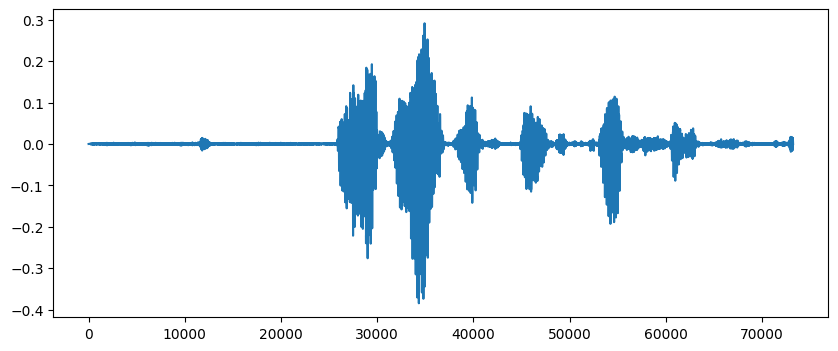

In [8]:
y,sr = lb.load("AI_SPEECH.wav")
plt.figure(figsize=(10,4))
plt.plot(y)

[ 0.08419468+0.j          0.28506782+0.26765306j  0.15541771-0.45751807j
 ... -0.08531455-0.51935847j  0.15541771+0.45751807j
  0.28506782-0.26765306j]


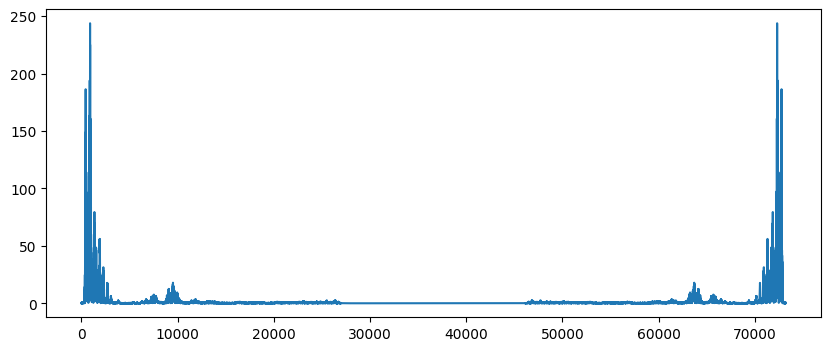

In [9]:
ft = np.fft.fft(y)
print(ft)
plt.figure(figsize=(10,4))
plt.plot(abs(ft))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, ' original signal')

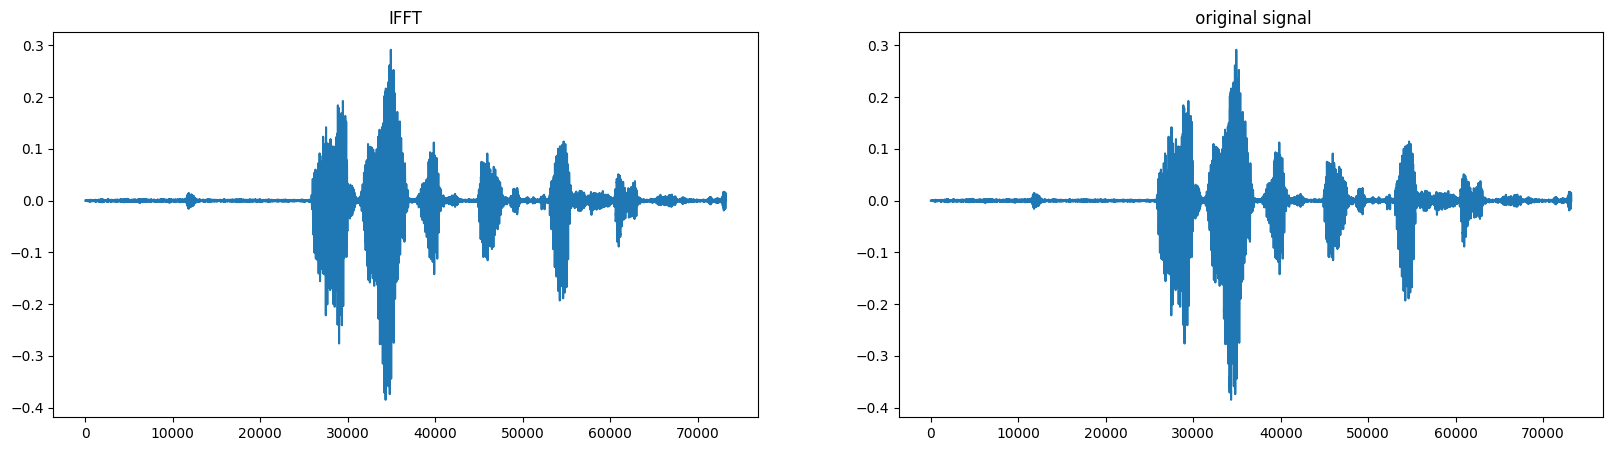

In [10]:
ift = np.fft.ifft(ft)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ift)
plt.title('IFFT')
plt.subplot(1,2,2)
plt.plot(y)
plt.title(' original signal')

In [15]:
len(y)
Audio(y[14000:22000],rate = sr)


Text(0.5, 1.0, 'word')

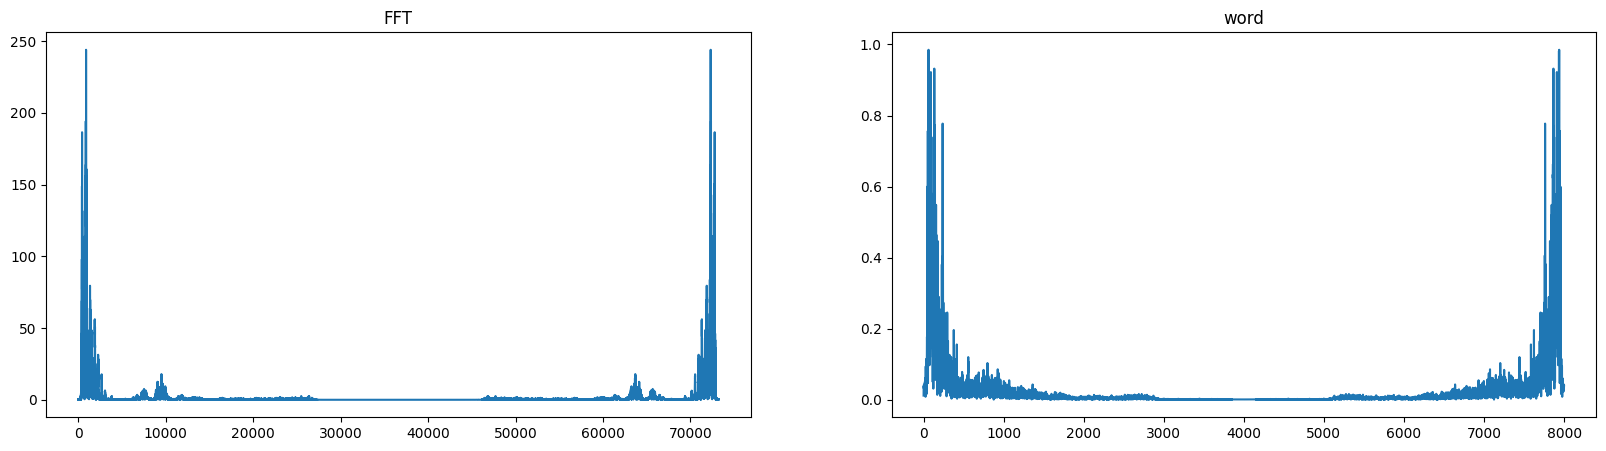

In [16]:
word = y[14000:22000]
word_fft = np.fft.fft(word)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.abs(ft))
plt.title('FFT')
plt.subplot(1,2,2)
plt.plot(np.abs(word_fft))
plt.title('word')

In [17]:
y_22500,r = lb.load("AI_SPEECH.wav",sr = 22500)
Audio(y_22500,rate = r)

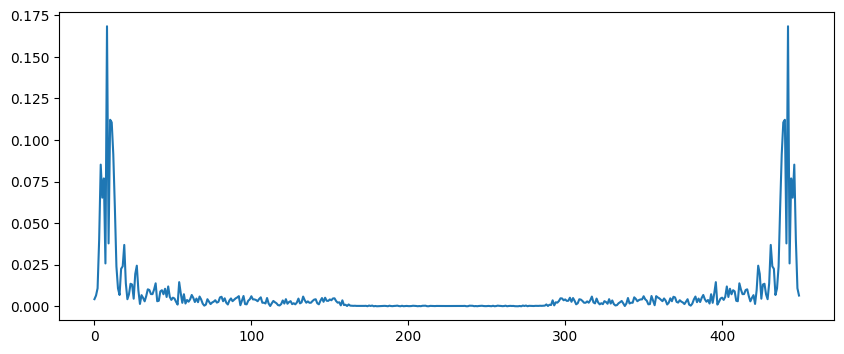

In [18]:
ft_2 = np.fft.fft(y_22500[10000:10450])
plt.figure(figsize=(10,4))
plt.plot(abs(ft_2))

In [19]:
y = lb.stft(y_22500,n_fft=450,hop_length=225)
print(y)

[[ 1.2403418e-03+0.00000000e+00j  2.7564916e-04+0.00000000e+00j
  -6.9436389e-03+0.00000000e+00j ... -2.2094881e-03+0.00000000e+00j
  -3.4607534e-04+0.00000000e+00j  1.2768450e-01+0.00000000e+00j]
 [-1.0163577e-03+9.62427061e-04j  4.0742246e-04+8.91046002e-05j
   5.9829964e-03-1.93213357e-03j ...  5.6079919e-03-9.42101644e-04j
  -9.4990974e-04+5.15086669e-03j -1.3075139e-01+7.21413083e-03j]
 [-4.4435568e-04-1.05171476e-03j  1.5993308e-03+6.37744728e-04j
  -6.9550974e-03-1.65534054e-03j ... -8.7910062e-03-1.84564739e-02j
  -2.2033250e-02+6.45629689e-03j  1.5234421e-01-1.52281355e-02j]
 ...
 [-3.7417360e-06+7.47566219e-07j -1.9377614e-08-5.18525454e-08j
   1.0312068e-07+1.73060375e-08j ...  3.8330434e-08+9.34111313e-08j
   3.4629977e-07+1.85699207e-07j -1.4173760e-04-4.69835977e-05j]
 [ 3.5950609e-06-4.30263981e-07j  1.1237274e-07+2.21573195e-08j
   1.3141968e-07+4.15256141e-09j ... -1.3880244e-08+1.22613466e-08j
   2.3875609e-07+3.35004415e-08j  1.4744987e-04+2.37027543e-05j]
 [-3.73381

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


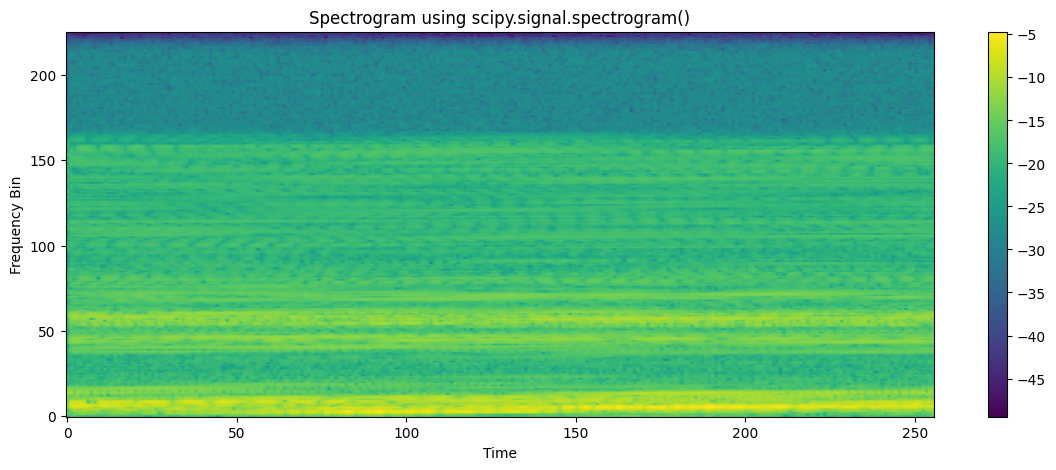

In [21]:
freq_spectogram, times_spectogram, spectrogram_matrix = spectrogram(y,22500)
plt.figure(figsize=(14, 5))
plt.imshow(np.log(spectrogram_matrix), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Spectrogram using scipy.signal.spectrogram()")
plt.xlabel("Time")
plt.ylabel("Frequency Bin")
plt.show()